# Regressió 

> In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the outcome or response variable, or a label in machine learning parlance) and one or more error-free independent variables (often called regressors, predictors, covariates, explanatory variables or features). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.  [Link](https://en.wikipedia.org/wiki/Regression_analysis)

En un problema de regressió, l’objectiu és predir un valor continu, com ara el preu d’una casa basant-se en característiques com la mida, el nombre d’habitacions o la ubicació. En aquest cas, la sortida pot ser qualsevol valor numèric dins d’un rang, ja que no hi ha categories discretes. Mentre que la regressió busca valors continus, la classificació busca etiquetes discretes per a cada instància.

## Regressió lineal

El model de **regressió lineal** és una tècnica senzilla i potent per a problemes de regressió, que té com a objectiu trobar la relació lineal entre una variable dependent i una o més variables independents. Aquest model assumeix que hi ha una connexió directa entre les variables, expressada com una línia recta en el cas d’una variable independent (regressió lineal simple) o com un hiperplà en espais de més dimensions (regressió lineal múltiple).

La seva funció principal és aproximar les dades amb una funció lineal, minimitzant la suma dels errors quadràtics entre les prediccions del model i els valors reals observats. Això es fa, com heu vist a teoria, mitjançant el mètode de mínims quadrats, que ajusta els coeficients de la línia per a obtenir la millor aproximació possible dels punts de dades.

$$\hat{y}=w_{0} + w_{1}x_1$$

On $w_{0}$ és el biaix o *intercept* i $w_1$ és el coefficient de la variable independent.

Gràficament aquest model és pot visualitzar de la següent manera:

![proces](regression.png)

Per models de regressió lineal multiple l'equació prèvia es modifica de la següent manera:

$$\hat{y}=w_{0} + \sum^{n}_{i=1} w_{i}\cdot x_i$$

On $w_{0}$ és el biaix o *intercept* i $w_i$ és el coefficient $i$ de la variable independent $i$-essima.

### **Recodatori**: 1,2,3 Aprenentatge automàtic

Hem de seguir el mateix procés que vàrem veure la setmana passada:

1. Tractament de les dades.
2. Entrenament.
3. Anàlisis dels resultats.

Per fer-ho el primer que hem de fer és importar les llibreries. 

In [7]:
import math
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Posteriorment crearem unes dades amb les que fer feina.

In [8]:
X, y = make_regression(
    n_samples=400, n_features=1, n_informative=1, noise=50.0, random_state=42
)

Una vegada tenim les dades miram com són les dades.

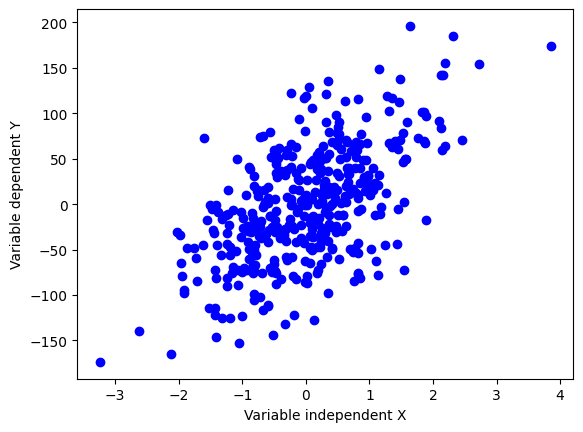

In [9]:
plt.scatter(X, y, color="blue")
plt.xlabel("Variable independent X")
plt.ylabel("Variable dependent Y")
plt.show()

Crearem un model de regressió lineal per poder fer una predicció sobre les dades. És molt important el paràmetre de ``fit_intercept``. 

In [10]:
regr = LinearRegression(fit_intercept=True)

Una vegada creat l'objecte l'entrenam amb les dades que hem generat. Primer però hem de separar les dades en train i test.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

Ara sí que podem entrenar el model amb les dades d'entrenament. 

In [12]:
regr.fit(X_train, y_train);

El resultat de l'entrenament és que ara el model té un biaix i un pes per cada *feature*.

In [13]:
regr.intercept_

np.float64(-2.2869407457128923)

In [14]:
regr.coef_

array([38.04357551])

### Estimam el valors

Una vegada tenim el model entrenat podem fer prediccions. Aquestes prediccions són amb la formula ja coneguda de la regressió lineal. Per desmotrar-ho mostrarem el valor de fer la predicció i de fer les operacions de dos punts.

In [15]:
punts_simples = np.array([1, 2]).reshape((-1, 1))
print(
    (
        regr.predict(punts_simples),
        [regr.coef_ * 1 + regr.intercept_, regr.coef_ * 2 + regr.intercept_],
    )
)

(array([35.75663476, 73.80021027]), [array([35.75663476]), array([73.80021027])])


Anem a mostrar la preddició del test.

In [16]:
y_pred = regr.predict(X_test)

Comparam les dades original amb el model estimat.

In [17]:
punts = [regr.coef_ * -3.5 + regr.intercept_, regr.coef_ * 3.5 + regr.intercept_]

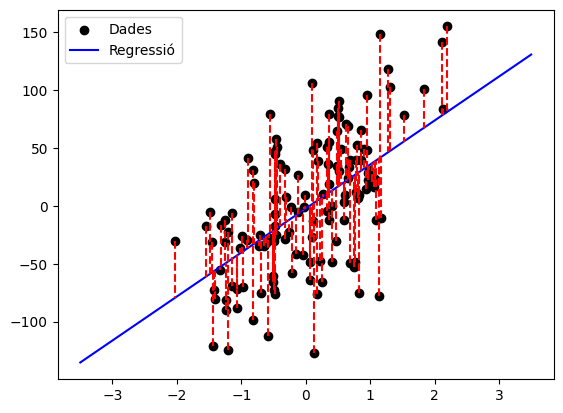

In [18]:
plt.scatter(X_test, y_test, c="black", label="Dades")
plt.plot([-3.5, 3.5], punts, c="blue", label="Regressió")

for x_t, y_t, y_p in zip(X_test, y_test, y_pred):
    plt.plot([x_t, x_t], [y_t, y_p], c="red", linestyle="--")  # Error lines

plt.legend();

### Obtenim mètriques

Els problemes de regressió també tenen mètriques que ens indiquen la bondat de les nostres prediccions. Nosaltres emprarem dues mètriques diferents: $MSE$ i $MAE$.

$MAE(X, Y) = \frac{\sum_{i=0}^{n} |X_i - Y_i|}{n}$


$MSE(X, Y) = \frac{\sum_{i=0}^{n} (X_{i} - Y_i)^2}{n}$.

Les dues mesures:

In [19]:
mean_absolute_error(y_test, y_pred)

np.float64(38.38699036801307)

In [23]:
mean_squared_error(y_test, y_pred)

np.float64(2258.895705181109)

In [20]:
import math

math.sqrt(mean_squared_error(y_test, y_pred))

47.527841368834636

In [21]:
min(y_test), max(y_test)

(np.float64(-127.5441937319531), np.float64(155.15072696772148))